In [50]:
#@title Librerias
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.integrate import quad, nquad, fixed_quad, trapezoid, simpson
from sympy import symbols, diff, integrate, lambdify

# Parcial II - Métodos Computacionales (Integrales y Matrices)
**2024-2**

---

*Nombre:* Ross Anthony Miranda D'Angelo

*Identificación:* 1034988497

---
* Sea honest@
* El uso de herramientas de IA no está permitido
* Puede consultar la documentación de las librerias.
* Sea ordendado dando la solución a cada punto.
* *Asegurese que el notebook corra completamente*
* Suba su notebook al GitHub (en su carpeta) y recuerde hacer pull-request

# 1

**(20 puntos)**
Considera la siguiente integral:

$$
I = \int_0^1 \int_{x^2}^{x+1} \int_{y^2}^{y+2} \int_{z^2}^{z+3} (x+y+z+w) \, dw \, dz \, dy \, dx
$$

Encuentre la solución númerica usando unicamente `quad`. Encuentre el error relativo, para esto emplee el siguiente código que usa `nquad`:


```python
# Definir el integrando
integrand = lambda w, z, y, x: x + y + z + w

# Definir los límites usando funciones lambda
w_limits = lambda z, y, x: [z**2, z+3]
z_limits = lambda y, x: [y**2, y+2]
y_limits = lambda x: [x**2, x+1]
x_limits = lambda: [0, 1]

# Calcular la integral usando nquad
result, error = nquad(
    integrand,
    [w_limits, z_limits, y_limits, x_limits]
)

print(f"Resultado de la integral: {result}")
print(f"Error estimado: {error}")
```



In [51]:
# Aqui va su código

def integrando(w, z, y, x):
    return x + y + z + w

def integral_mult(x):
    def integral_z(y):
        def integral_w(z):
            def f(w):
              return integrando(w, z, y, x)
            res, _ = quad(f, z**2, z + 3)
            return res
        res, _ = quad(integral_w, y**2, y + 2)
        return res

    res, _ = quad(integral_z, x**2, x + 1)
    return res

result_quad, _ = quad(integral_mult, 0, 1)

print(f"Resultado de la integral (solo usando quad): {result_quad}")


Resultado de la integral (solo usando quad): -0.6500971589021813


In [52]:
#CODIGO PROPUESTO EN EL EJERCICIO!!!!

integrando = lambda w, z, y, x: x + y + z + w
w_limits = lambda z, y, x: [z**2, z+3]
z_limits = lambda y, x: [y**2, y+2]
y_limits = lambda x: [x**2, x+1]
x_limits = lambda: [0, 1]

result_nquad, error_nquad = nquad(
    integrando,
    [w_limits, z_limits, y_limits, x_limits]
)

print(f"Resultado de la integral (nquad): {result_nquad}")
print(f"Error estimado (nquad): {error_nquad}")

# AGREGADO: Calcular el error relativo comparando las dos
error_relativo = abs(result_quad - result_nquad) / abs(result_nquad)
print(f"Error relativo: {error_relativo}") #Al parecer si da 0 porque son iguales

Resultado de la integral (nquad): -0.6500971589021813
Error estimado (nquad): 1.8391891749223705e-12
Error relativo: 0.0


# 2

**(40 puntos)**
Un lazo de corriente de radio $a$  transporta una corriente $I$ en el punto P que está a una distancia $r$ del centro del lazo con coordenadas esféricas (r, θ, φ). Resuelve para la componente φ del potencial vectorial en el punto $P$ en términos de integrales elípticas:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}

donde

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}

\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}

Aquí, $K(k)$ es una integral elíptica completa del primer tipo y $E(k)$ es una integral elíptica completa del segundo tipo.


Para
* $a$ = 1,
* $I$ = 3,
* $μ0/4π$ = 1


Usando funciones explicitas explique claramente las entradas, salidas y procedimientos dentro de las mismas. Recuerde para resolver las integrales usar `quad` y grafique para:

*a)* $A_φ(r = 1.1, θ)$ vs. $0\leq θ\leq \pi$

*b)* $A_φ(r, θ = π∕3)$ vs. $0\leq r \leq 10$

Tenga cuidado con la convergencia de su integral



In [53]:
# Aqui va su código

In [54]:
#codigo de las funciones namas

def intelip_k(k):
    integrand = lambda phi: 1 / np.sqrt(1 - k**2 * np.sin(phi)**2)
    result, _ = quad(integrand, 0, np.pi/2)
    return result

def intelip_e(k):
  integrand = lambda phi: np.sqrt(1 - k**2 * np.sin(phi)**2)
  result, _ = quad(integrand, 0, np.pi/2)
  return result

def vector_potencial_phi(r, theta, a=1, I=3):
  k_squared = (4 * a * r * np.sin(theta)) / (a**2 + r**2 + 2 * a * r * np.sin(theta))
  k = np.sqrt(k_squared)

  # caso donde k esta bien cerca de uno, evitando asi la divergencia de la funcion
  if np.isclose(k, 1, atol=1e-10):
    return 0  # por poner algo :")))

  result = (4 * I * a) / np.sqrt(a**2 + r**2 + 2 * a * r * np.sin(theta))
  result *= ((2 - k_squared) * intelip_k(k) - 2 * intelip_e(k)) / k_squared
  print(result)
  return result

nan
0.10016600561197463
0.2005124557190307
0.3012207509049175
0.4024742150268971
0.5044590848286465
0.6073655337867857
0.711388742729328
0.8167300307805958
0.9235980615192756
1.0322101409360127
1.142793625900145
1.2555874644779002
1.370843892682482
1.4888303162113672
1.6098314106038794
1.7341514792383177
1.862117115954119
1.9940802281726342
2.1304214876426872
2.271554289925947
2.4179293212071897
2.5700398529349844
2.7284279124422275
2.8936915127407055
3.066493169345709
3.2475699892019847
3.4377456904636765
3.6379450071928012
3.8492110568511912
4.072726409714754
4.309838809535699
4.562092768068541
4.831268608470741
5.119430978630302
5.428989398519211
5.76277401274359
6.124130258159863
6.517036239738167
6.946245210583062
7.417450043935085
7.937450258018511
8.51425772847672
9.156959517733249
9.874846013757004
10.674500897762709
11.551523235417857
12.469411147671924
13.316109145354432
13.862937396351994
13.862937396351994
13.316109145354432
12.469411147671924
11.551523235417857
10.67450089

<ipython-input-54-064925430575>:22: RuntimeWarning: invalid value encountered in scalar divide
  result *= ((2 - k_squared) * intelip_k(k) - 2 * intelip_e(k)) / k_squared


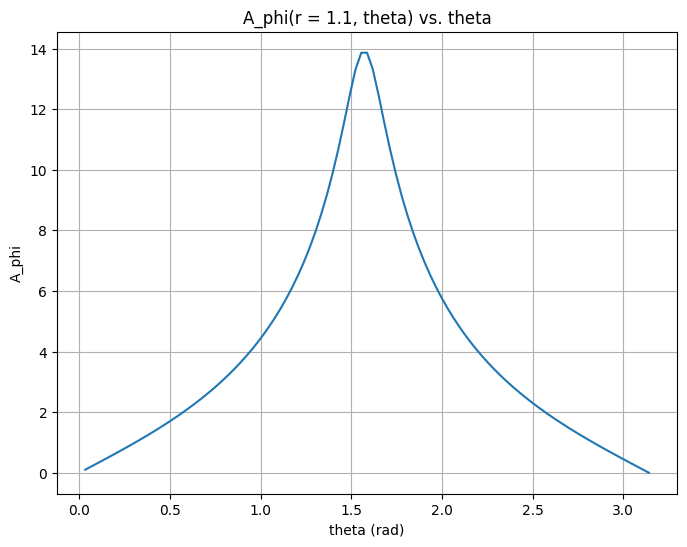

In [55]:
# a) A_phi(r = 1.1, theta) vs. theta
theta_valores = np.linspace(0, np.pi, 100)
a_phi_values_a = [vector_potencial_phi(r=1.1, theta=theta) for theta in theta_valores]

plt.figure(figsize=(8, 6))
plt.plot(theta_valores, a_phi_values_a)
plt.title("A_phi(r = 1.1, theta) vs. theta")
plt.xlabel("theta (rad)")
plt.ylabel("A_phi")
plt.grid(True)
plt.show()

<ipython-input-54-064925430575>:22: RuntimeWarning: invalid value encountered in scalar divide
  result *= ((2 - k_squared) * intelip_k(k) - 2 * intelip_e(k)) / k_squared


nan
0.8236416147872662
1.6418180640377955
2.445979012891804
3.2208183465090574
3.939847508513152
4.561487635794527
5.030210015486518
5.290393742094077
5.314395469317808
5.1255036489543855
4.789513036323349
4.381521693323024
3.959394812722186
3.55726517889855
3.190856695557225
2.86481746546659
2.5781386819824013
2.3273583329851344
2.1082392768637757
1.916569463337597
1.7485005588927798
1.6006581557136523
1.47014579528196
1.3545043176447062
1.2516563827007663
1.159849945377614
1.077606493100037
1.0036760013141692
0.9369987822945426
0.876673648803786
0.8219315576981528
0.7721138727333907
0.726654458087087
0.6850649200188709
0.6469224236002886
0.6118596117260872
0.5795562402407819
0.5497322154914474
0.5221417801483172
0.49656864150577684
0.4728218755371264
0.4507324714192411
0.43015040652430275
0.41094216220592267
0.3929886070745967
0.37618318765809994
0.36043037701318215
0.345644340502416
0.3317477849776355
0.31867096333919387
0.30635081112284573
0.2947301956055001
0.28375726107957405
0.2

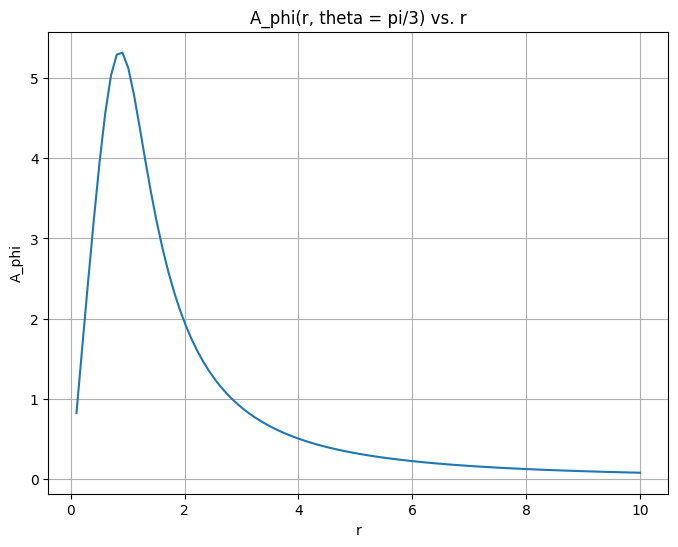

In [56]:

# b) A_phi(r, theta = pi/3) vs. r
r_valores = np.linspace(0, 10, 100)
a_phi_values_b = [vector_potencial_phi(r=r, theta=np.pi/3) for r in r_valores]

plt.figure(figsize=(8, 6))
plt.plot(r_valores, a_phi_values_b)
plt.title("A_phi(r, theta = pi/3) vs. r")
plt.xlabel("r")
plt.ylabel("A_phi")
plt.grid(True)
plt.show()

# 3

(**40 puntos**) El **método de la potencia inversa** es una técnica iterativa utilizada para calcular el autovalor de menor magnitud de una matriz cuadrada. Es una variante del **método de la potencia**, que normalmente encuentra el autovalor de mayor magnitud. Para ello, se aprovecha la propiedad de la matriz inversa:

$$ A^{-1} v = \frac{1}{\lambda} v $$


## Algoritmo

El método de la potencia inversa sigue los siguientes pasos:

1. Elegir un vector inicial $x^{(0)}$ no nulo.

2. Para cada iteración $k$, resolver el sistema lineal:
   
   $$ A y^{(k)} = x^{(k-1)} $$
   
   donde $y^{(k)}$ es un **vector intermedio** que se obtiene resolviendo el sistema lineal. Este vector representa la solución del sistema en cada iteración y es crucial para aproximar el autovector de menor autovalor.

3. Normalizar $y^{(k)}$ para obtener un nuevo vector de iteración:
   
   $$ x^{(k)} = \frac{y^{(k)}}{\| y^{(k)} \|} $$
   
4. Aproximar el autovalor mediante el cociente de Rayleigh:
   
   $$ \lambda^{(k)} = \frac{(x^{(k)})^T A x^{(k)}}{(x^{(k)})^T x^{(k)}} $$
   
5. Repetir los pasos anteriores hasta que la diferencia entre valores sucesivos de $\lambda$ sea menor que un umbral de tolerancia.

---

*a)* Escriba una función llamada `potencia_inversa` que dada una matriz A encuentre su valor propio menos dominante (con una tolerancia de 1e-7 usando la norma Euclidiana) y su correspondiente autovector. Para obtener $y^{(k)}$ puede emplear `np.linalg.solve` recordando que $Ay = x$.

*b)* Usando la matriz A, encuentre el $\lambda_{min}$ y el correspondiente autovector. Examine la convergencia de su autovalor en función de las iteraciones, esto es, haga un gráfico de $\lambda(k)$

$$
\begin{bmatrix}
5 & 2 \\
2 & 2
\end{bmatrix}
$$

*c)* Compare su resultado con `np.linalg.eig`

In [57]:
# Aqui va su código

#a

def potencia_inversa(A, tol=1e-7):

  n = A.shape[0]  # Tamaño de A
  x = np.random.rand(n)  # Vector inicial aleatorio, generando un A 2x2 aleatorio
  x = x / np.linalg.norm(x)  # Normalizar el vector inicial
  lambda_anterior = 0  # Iniciar el valor propio anterior

  while True:
    y = np.linalg.solve(A, x)  # Resolver el sistema lineal Ay = x
    x = y / np.linalg.norm(y)  # Normaliza y
    lambda_actual = x.T @ A @ x  # Calcular el valor propio actual

    #conver
    if abs(lambda_actual - lambda_anterior) < tol:
      break

    lambda_anterior = lambda_actual  # Actualizar el valor propio anterior

  return lambda_actual, x

#Dada una matriz A cualquiera,  aqui el apartado en donde se crea A aleatoriamentre, importante ejecytar este codigo y LUEGO el siguiente
#ya que el siguiente es dependiente de este

  #random 2x2 A
A = np.random.rand(2, 2)

lambda_min, autovector = potencia_inversa(A)

print("Matriz A:")
print(A)
print("\nAutovalor mínimo:", lambda_min)
print("Autovector correspondiente:", autovector)

Matriz A:
[[0.65365161 0.8485301 ]
 [0.36555607 0.38061016]]

Autovalor mínimo: -0.05630022833638762
Autovector correspondiente: [-0.76695581  0.64169991]


Autovalor mínimo (potencia inversa): -0.05630022054948844
Autovector correspondiente: [ 0.76695582 -0.6416999 ]


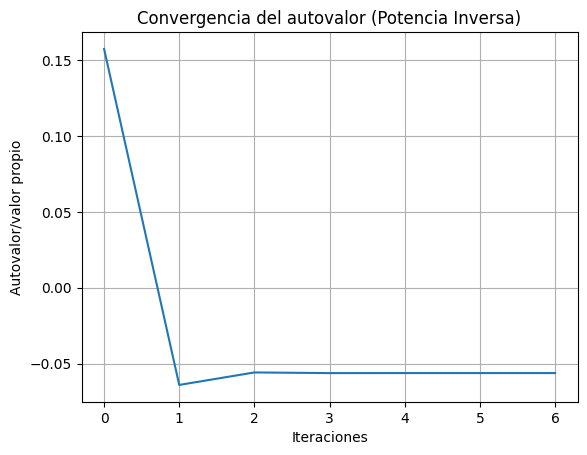


Autovalor mínimo (np.linalg.eig): -0.0563002235139331
Autovector correspondiente: [-0.76695582  0.64169991]

 son parecidos? True


In [58]:
# Definir la matriz A del ejercicio SI SE QUIERE COMPROBAR EL EJ QUITARLE EL # A LA LINEA DE ABAJOO
#A = np.array([[5, 2], [2, 2]])


#Aunque sinceramente creo que hay un error, ya que aunque el cod anterior de un A aleatorio, la grafica termina siendo siempre la misma
#  EDIT: Ya no hay error estoy feliz :)


# b)
autovalores_potencia_inversa = []  # Lista para almacenar los autovalores en cada iteración

def potencia_inversa_con_seguimiento(A, tol=1e-7):
    n = A.shape[0]
    x = np.random.rand(n)
    x = x / np.linalg.norm(x)
    lambda_anterior = 0

    while True:
        y = np.linalg.solve(A, x)
        x = y / np.linalg.norm(y)
        lambda_actual = x.T @ A @ x

        autovalores_potencia_inversa.append(lambda_actual)  # Agregar el autovalor a la lista

        if abs(lambda_actual - lambda_anterior) < tol:
            break

        lambda_anterior = lambda_actual

    return lambda_actual, x

lambda_min, autovector = potencia_inversa_con_seguimiento(A)

print("Autovalor mínimo (potencia inversa):", lambda_min)
print("Autovector correspondiente:", autovector)

# Graficar la convergencia
plt.plot(autovalores_potencia_inversa)
plt.title("Convergencia del autovalor (Potencia Inversa)")
plt.xlabel("Iteraciones")
plt.ylabel("Autovalor/valor propio")
plt.grid(True)
plt.show()

# c)
autovalores_eig, autovectores_eig = np.linalg.eig(A)

# Encontrar el índice del min valor propio
indice_min = np.argmin(autovalores_eig)
lambda_min_eig = autovalores_eig[indice_min]
autovector_eig = autovectores_eig[:, indice_min]

print("\nAutovalor mínimo (np.linalg.eig):", lambda_min_eig)
print("Autovector correspondiente:", autovector_eig)

#Comparar
print("\n son parecidos?", np.isclose(lambda_min, lambda_min_eig))

#4

**(10 puntos)**
Sea $A$ una matriz cuadrada de tamaño $n \times n$. Se sabe que el determinante de una matriz es igual al producto de sus autovalores:

$$
\det(A) = \prod_{i=1}^{n} \lambda_i
$$

donde $\lambda_1, \lambda_2, \dots, \lambda_n$ son los autovalores de $A$.

Usando una matriz aleatoria $A$ de $5\times 5$, demuestre esta propiedad. Puede usar las funciones de `np.linalg`.

In [59]:
#matriz random 5x5
A = np.random.rand(5, 5)

det_A = la.det(A)

# vaolers propios A
eigenvalues = la.eigvals(A)

mult_eigenvalues = np.prod(eigenvalues)
real_mult_eigenvalues = np.real(mult_eigenvalues)

print("Determinante de A:", det_A)
print("Producto de los valores propios matriz A:", mult_eigenvalues)

print("\nParte real del producto de los valores propios matriz A:", real_mult_eigenvalues)

# Comparar
print("\n son parecidos?", np.isclose(det_A, real_mult_eigenvalues))


Determinante de A: 0.012762149561387881
Producto de los valores propios matriz A: (0.01276214956138791-0j)

Parte real del producto de los valores propios matriz A: 0.01276214956138791

 son parecidos? True
